In [64]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [65]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('diamonds.csv')

In [66]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        diamonds[var] = diamonds[var].astype(ordered_var)
    else: # pre-v0.21
        diamonds[var] = diamonds[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

In [67]:
def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

# Bar Charts

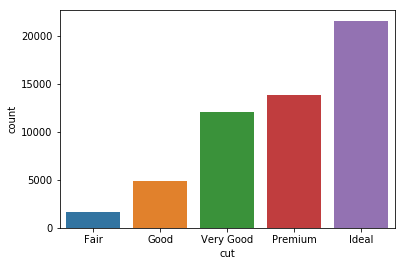

In [68]:
sb.countplot(data = diamonds, x = 'cut');

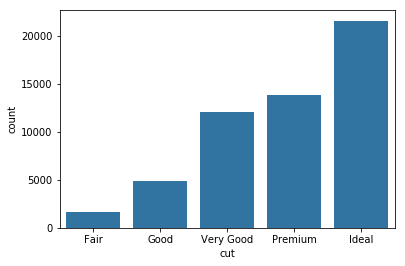

In [69]:
df = diamonds
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'cut', color = base_color);

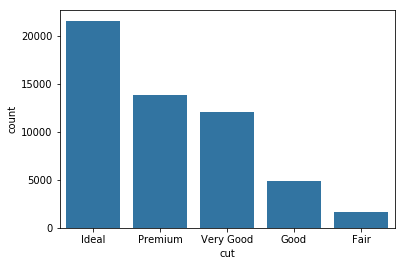

In [70]:
base_color = sb.color_palette()[0]
cat_order = df['cut'].value_counts().index
sb.countplot(data = df, x = 'cut', color = base_color, order = cat_order)

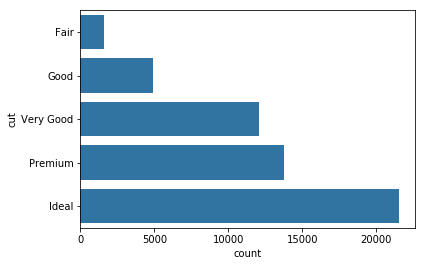

In [71]:
base_color = sb.color_palette()[0]
sb.countplot(data = df, y = 'cut', color = base_color)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

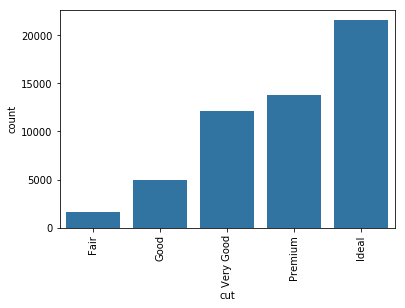

In [72]:
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'cut', color = base_color)
plt.xticks(rotation = 90)

## Proportion

Text(0, 0.5, 'proportion')

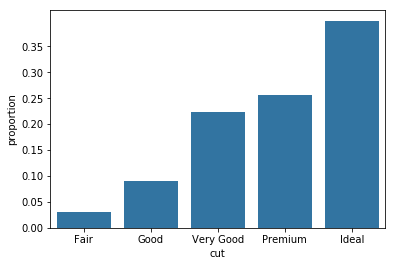

In [73]:
# get proportion taken by most common group for derivation
# of tick marks
n_points = df.shape[0]
max_count = df['cut'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'cut', color = base_color)
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion')

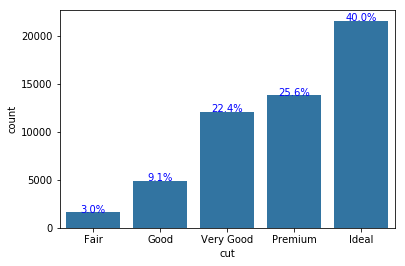

In [74]:
# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'cut', color = base_color)

# add annotations
n_points = df.shape[0]
cat_counts = df['cut'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'b')

## Show NA

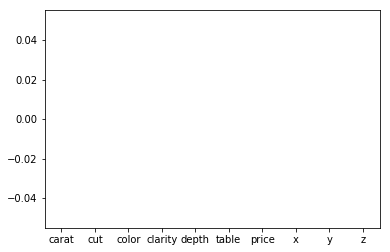

In [75]:
na_counts = df.isna().sum()
base_color = sb.color_palette()[0]
sb.barplot(na_counts.index.values, na_counts, color = base_color);

In [25]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [30]:
"""
Script with solutions for all workspace assignments in the Univariate
Exploration of Data lesson.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


def bar_chart_solution_1():
    """
    Solution for Question 1 in bar chart practice: create a bar chart of
    Pokemon species introduced by generation.
    """
    sol_string = ["I used seaborn's countplot function to generate this chart.",
                  "I also added an additional argument so that each bar has the same color."]
    print((" ").join(sol_string))

    # data setup
    pokemon = pd.read_csv('./pokemon.csv')

    base_color = sb.color_palette()[0]
    sb.countplot(data = pokemon, x = 'generation_id', color = base_color)


def bar_chart_solution_2():
    """
    Solution for Question 2 in bar chart practice: create a sorted bar chart of
    relative type frequencies.
    """
    sol_string = ["I created a horizontal bar chart since there are a lot of",
                  "Pokemon types. The unique() method was used to get the",
                  "number of different Pokemon species. I also added an xlabel",
                  "call to make sure it was clear the bar length represents",
                  "a relative frequency."]
    print((" ").join(sol_string))

    # data setup
    pokemon = pd.read_csv('./pokemon.csv')
    pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()

    # get order of bars by frequency
    type_counts = pkmn_types['type'].value_counts()
    type_order = type_counts.index

    # compute largest proportion
    n_pokemon = pkmn_types['species'].unique().shape[0]
    max_type_count = type_counts[0]
    max_prop = max_type_count / n_pokemon

    # establish tick locations and create plot
    base_color = sb.color_palette()[0]
    tick_props = np.arange(0, max_prop, 0.02)
    tick_names = ['{:0.2f}'.format(v) for v in tick_props]

    base_color = sb.color_palette()[0]
    sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order)
    plt.xticks(tick_props * n_pokemon, tick_names)
    plt.xlabel('proportion')


def histogram_solution_1():
    """
    Solution for Question 1 in histogram practice: create a histogram of
    Pokemon special defense values.
    """
    sol_string = ["I've used matplotlib's hist function to plot the data.",
                  "I have also used numpy's arange function to set the bin edges.",
                  "A bin size of 5 hits the main cut points, revealing a smooth,",
                  "but skewed curves. Are there similar characteristics among",
                  "Pokemon with the highest special defenses?"]
    print((" ").join(sol_string))

    # data setup
    pokemon = pd.read_csv('./pokemon.csv')

    bins = np.arange(20, pokemon['special-defense'].max()+5, 5)
    plt.hist(pokemon['special-defense'], bins = bins)


def scales_solution_1():
    """
    Solution for Question 1 in scales and transformation practice: create a
    histogram of Pokemon heights.
    """
    sol_string = ["There's a very long tail of Pokemon heights. Here, I've",
                  "focused in on Pokemon of height 6 meters or less, so that I",
                  "can use a smaller bin size to get a more detailed look at",
                  "the main data distribution."]
    print((" ").join(sol_string))

    # data setup
    pokemon = pd.read_csv('./pokemon.csv')

    bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
    plt.hist(data = pokemon, x = 'height', bins = bins)
    plt.xlim((0,6))


def scales_solution_2():
    """
    Solution for Question 2 in scales and transformation practice: create a
    histogram of Pokemon weights.
    """
    sol_string = ["Since Pokemon weights are so skewed, I used a log transformation",
                  "on the x-axis. Bin edges are in increments of 0.1 powers of ten,",
                  "with custom tick marks to demonstrate the log scaling."]
    print((" ").join(sol_string))

    # data setup
    pokemon = pd.read_csv('./pokemon.csv')

    bins = 10 ** np.arange(-1, 3.0+0.1, 0.1)
    ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
    labels = ['{}'.format(val) for val in ticks]

    plt.hist(data = pokemon, x = 'weight', bins = bins)
    plt.xscale('log')
    plt.xticks(ticks, labels)
    plt.xlabel('Weight (kg)')

I used seaborn's countplot function to generate this chart. I also added an additional argument so that each bar has the same color.


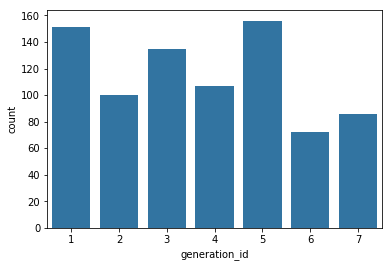

In [34]:
bar_chart_solution_1()

I created a horizontal bar chart since there are a lot of Pokemon types. The unique() method was used to get the number of different Pokemon species. I also added an xlabel call to make sure it was clear the bar length represents a relative frequency.


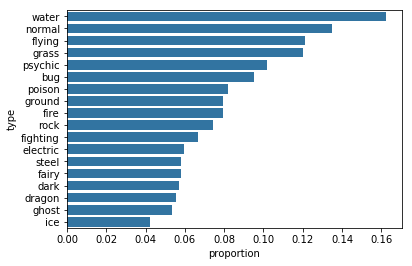

In [33]:
bar_chart_solution_2()

I've used matplotlib's hist function to plot the data. I have also used numpy's arange function to set the bin edges. A bin size of 5 hits the main cut points, revealing a smooth, but skewed curves. Are there similar characteristics among Pokemon with the highest special defenses?


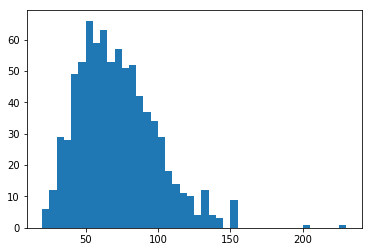

In [35]:
histogram_solution_1()

There's a very long tail of Pokemon heights. Here, I've focused in on Pokemon of height 6 meters or less, so that I can use a smaller bin size to get a more detailed look at the main data distribution.


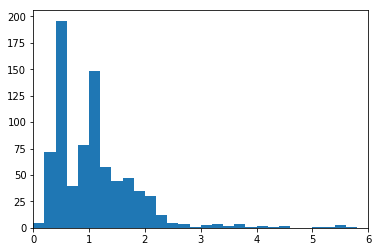

In [36]:
scales_solution_1()

Since Pokemon weights are so skewed, I used a log transformation on the x-axis. Bin edges are in increments of 0.1 powers of ten, with custom tick marks to demonstrate the log scaling.


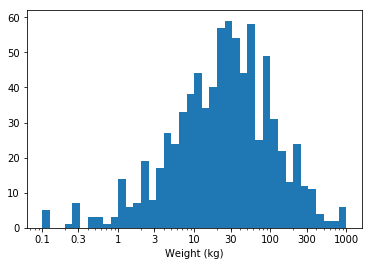

In [37]:
scales_solution_2()

# Pie Chart

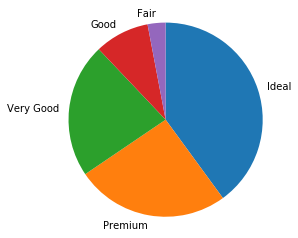

In [39]:
# code for the pie chart seen above
sorted_counts = df['cut'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square');

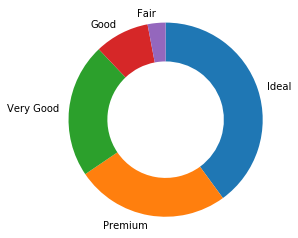

In [41]:
sorted_counts = df['cut'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square');

# Histograms

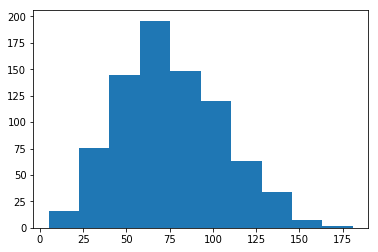

In [43]:
plt.hist(data = pokemon, x = 'attack');

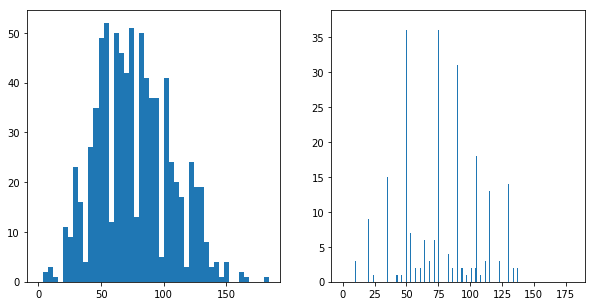

In [46]:
plt.figure(figsize = [10, 5]) # larger figure size for subplots

# histogram on left, example of too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, pokemon['attack'].max()+4, 4);
plt.hist(data = pokemon, x = 'attack', bins = bin_edges);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, pokemon['attack'].max()+1/4, 1/4);
plt.hist(data = pokemon, x = 'attack', bins = bin_edges);

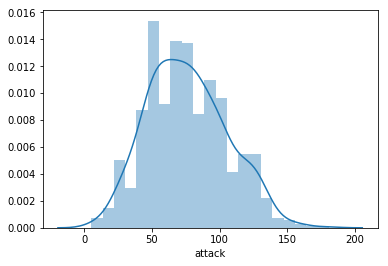

In [48]:
sb.distplot(pokemon['attack']);

# Figure, Axes

https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html

https://matplotlib.org/api/axes_api.html

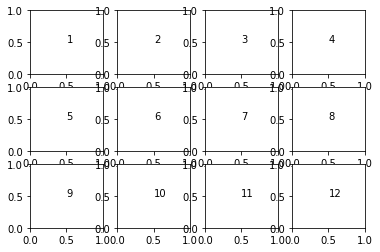

In [49]:
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes

In [ ]:
# Descriptive Statistics, Outliers, and Axis Limits

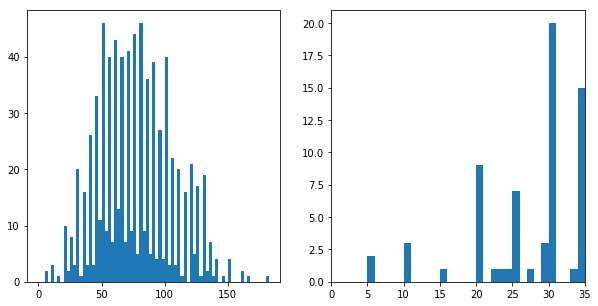

In [50]:
plt.figure(figsize = [10, 5])

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, pokemon['attack'].max()+2.5, 2.5);
plt.hist(data = pokemon, x = 'attack', bins = bin_edges);

# histogram on right: focus in on bulk of data < 35
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, 35+1, 1)
plt.hist(data = pokemon, x = 'attack', bins = bin_edges);
plt.xlim(0, 35); # could also be called as plt.xlim((0, 35))

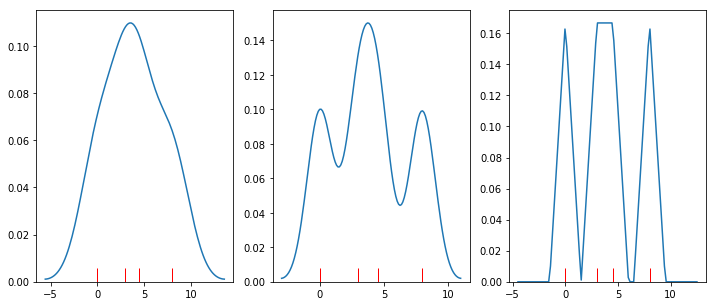

In [51]:
data = [0.0, 3.0, 4.5, 8.0]
plt.figure(figsize = [12, 5])

# left plot: showing kde lumps with the default settings
plt.subplot(1, 3, 1)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'})

# central plot: kde with narrow bandwidth to show individual probability lumps
plt.subplot(1, 3, 2)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' : 1})

# right plot: choosing a different, triangular kernel function (lump shape)
plt.subplot(1, 3, 3)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' : 1.5, 'kernel' : 'tri'})

# Waffle Plots

A lib could do it for you : https://github.com/ligyxy/PyWaffle

In [76]:
def percentage_blocks(df, var):
    """
    Take as input a dataframe and variable, and return a Pandas series with
    approximate percentage values for filling out a waffle plot.
    """
    # compute base quotas
    percentages = 100 * df[var].value_counts() / df.shape[0]
    counts = np.floor(percentages).astype(int) # integer part = minimum quota
    decimal = (percentages - counts).sort_values(ascending = False)

    # add in additional counts to reach 100
    rem = 100 - counts.sum()
    for cat in decimal.index[:rem]:
        counts[cat] += 1

    return counts

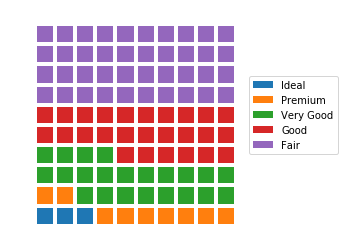

In [58]:
waffle_counts = percentage_blocks(df, 'cut')

prev_count = 0
# for each category,
for cat in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[cat])
    # and put a block at each index's location
    x = blocks % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get tens digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
    prev_count += waffle_counts[cat]

# aesthetic wrangling
plt.legend(waffle_counts.index, bbox_to_anchor = (1, 0.5), loc = 6);
plt.axis('off');
plt.axis('square');

(-54.339999999999996, 1132.34, 0.0, 1186.6799999999998)

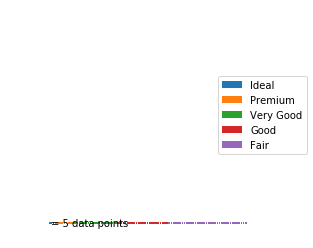

In [59]:
# each box represents five full counts
waffle_counts = (df['cut'].value_counts() / 5).astype(int)

prev_count = 0
# for each category,
for cat in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[cat])
    # and put a block at each index's location
    x = blocks % 10
    y = blocks // 10
    plt.bar(y, 0.8, 0.8, x)
    prev_count += waffle_counts[cat]

# box size legend
plt.bar(7.5, 0.8, 0.8, 2, color = 'white', edgecolor = 'black', lw = 2);
plt.text(8.1, 2.4,'= 5 data points', va = 'center');

# aesthetic wrangling
plt.legend(waffle_counts.index, bbox_to_anchor = (0.8, 0.5), loc = 6);
plt.axis('off');
plt.axis('square');

# Bi variate
## Scatterplot

In [77]:
df.head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


In [82]:
pokemon.head(1)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65


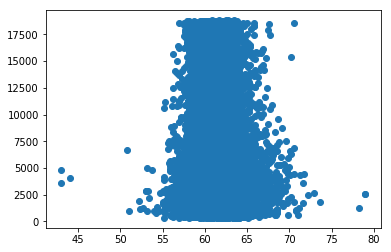

In [78]:
plt.scatter(data = df, x = 'depth', y = 'price');

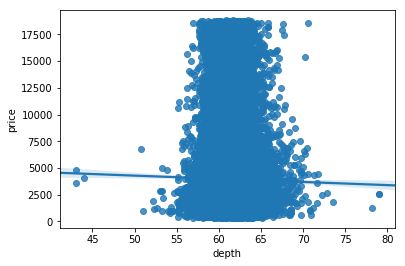

In [79]:
sb.regplot(data = df, x = 'depth', y = 'price');

([<matplotlib.axis.YTick at 0x24a04cf3710>,
 <a list of 6 Text yticklabel objects>)

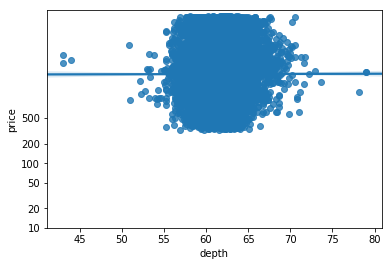

In [80]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sb.regplot(df['depth'], df['price'].apply(log_trans));
tick_locs = [10, 20, 50, 100, 200, 500]
plt.yticks(log_trans(tick_locs), tick_locs);

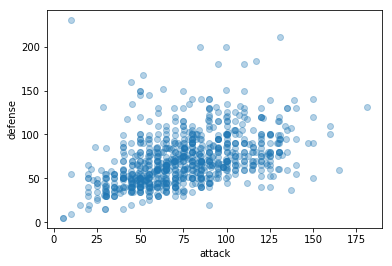

In [83]:
sb.regplot(data = pokemon, x = 'attack', y = 'defense', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3});

## Heat Maps

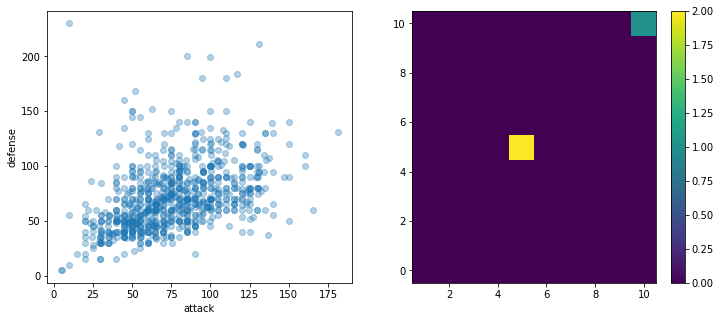

In [84]:
plt.figure(figsize = [12, 5])

# left plot: scatterplot of discrete data with jitter and transparency
plt.subplot(1, 2, 1)
sb.regplot(data = pokemon, x = 'attack', y = 'defense', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3});

# right plot: heat map with bin edges between values
plt.subplot(1, 2, 2)
bins_x = np.arange(0.5, 10.5+1, 1)
bins_y = np.arange(-0.5, 10.5+1, 1)
plt.hist2d(data = pokemon, x = 'attack', y = 'defense',
           bins = [bins_x, bins_y])
plt.colorbar();

In [ ]:
bins_x = np.arange(0.5, 10.5+1, 1)
bins_y = np.arange(-0.5, 10.5+1, 1)
plt.hist2d(data = df, x = 'disc_var1', y = 'disc_var2',
           bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()

In [ ]:
# hist2d returns a number of different variables, including an array of counts
bins_x = np.arange(0.5, 10.5+1, 1)
bins_y = np.arange(-0.5, 10.5+1, 1)
h2d = plt.hist2d(data = df, x = 'disc_var1', y = 'disc_var2',
               bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
counts = h2d[0]

# loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 7: # increase visibility on darkest cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')

## Violin Plots

In [85]:
fuel_econ = pd.read_csv('./fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


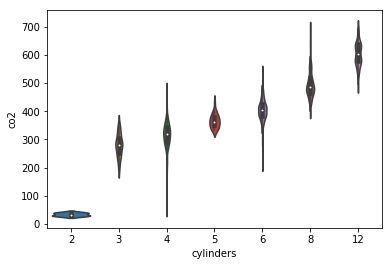

In [87]:
sb.violinplot(data = fuel_econ, x = 'cylinders', y = 'co2');

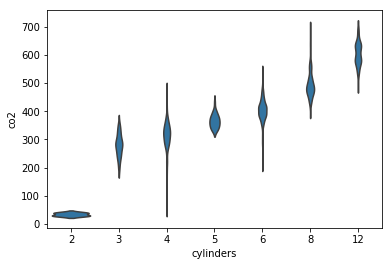

In [88]:
base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'cylinders', y = 'co2', color = base_color,
              inner = None);

## Box Plots

(-13.897395923551887, 758.0941368076467)

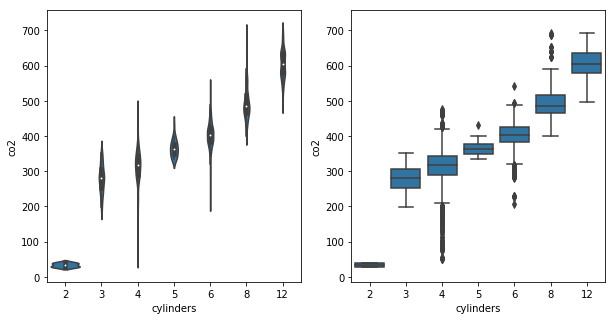

In [90]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = fuel_econ, x = 'cylinders', y = 'co2', color = base_color);

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = fuel_econ, x = 'cylinders', y = 'co2', color = base_color);
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

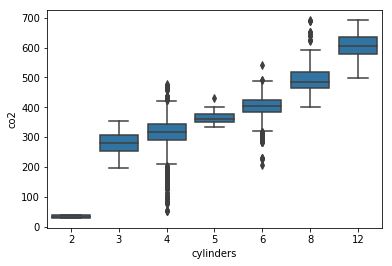

In [91]:
base_color = sb.color_palette()[0]
sb.boxplot(data = fuel_econ, x = 'cylinders', y = 'co2', color = base_color)

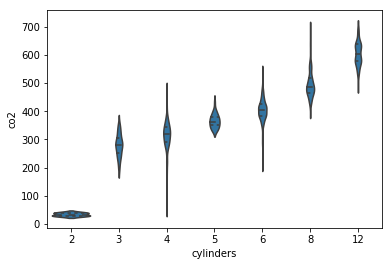

In [92]:
base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'cylinders', y = 'co2', color = base_color,
              inner = 'quartile')

## Clustered Bar Charts

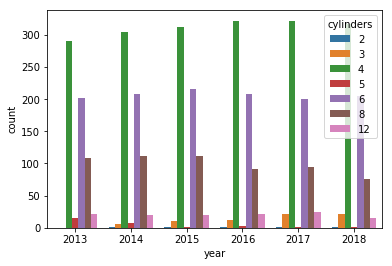

In [94]:
sb.countplot(data = fuel_econ, x = 'year', hue = 'cylinders');

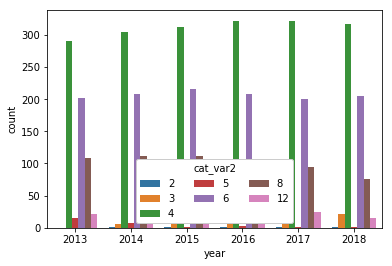

In [95]:
ax = sb.countplot(data = fuel_econ, x = 'year', hue = 'cylinders')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'cat_var2')

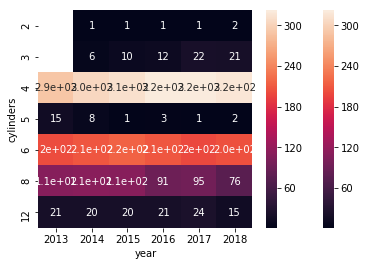

In [98]:
ct_counts = fuel_econ.groupby(['year', 'cylinders']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'cylinders', columns = 'year', values = 'count')
sb.heatmap(ct_counts)
sb.heatmap(ct_counts, annot = True) # , fmt = 'd' => error

## Faceting

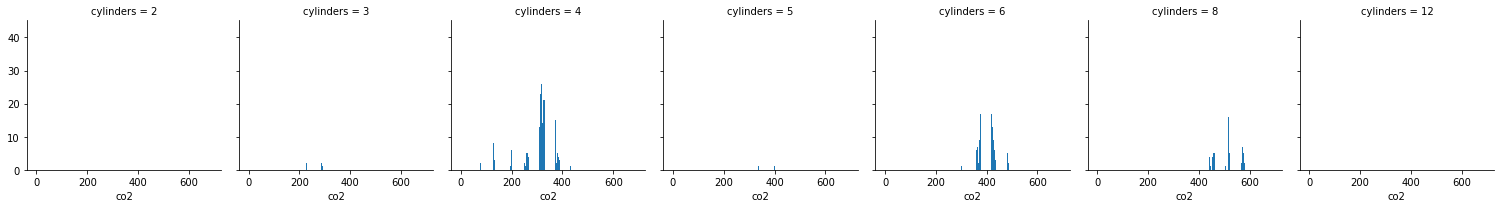

In [99]:
df = fuel_econ
bin_edges = np.arange(-3, df['co2'].max()+1/3, 1/3)
g = sb.FacetGrid(data = df, col = 'cylinders')
g.map(plt.hist, "co2", bins = bin_edges);

D:\dev\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


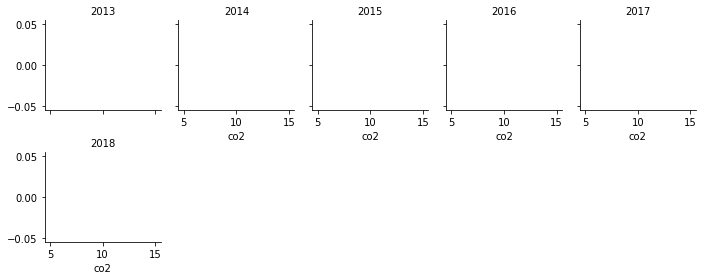

In [101]:
group_means = df.groupby(['year']).mean()
group_order = group_means.sort_values(['co2'], ascending = False).index

g = sb.FacetGrid(data = df, col = 'year', col_wrap = 5, size = 2,
                 col_order = group_order);
g.map(plt.hist, 'co2', bins = np.arange(5, 15+1, 1));
g.set_titles('{col_name}');

## Adapted Bar Charts

In [ ]:
base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'cat_var', y = 'num_var', color = base_color)

In [ ]:
sb.pointplot(data = df, x = 'cat_var', y = 'num_var', linestyles = "")
plt.ylabel('Avg. value of num_var')

In [ ]:
plt.figure(figsize = [12, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
sb.violinplot(data = df, x = 'condition', y = 'binary_out', inner = None,
              color = base_color)
plt.xticks(rotation = 10) # include label rotation due to small subplot size

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data = df, x = 'condition', y = 'binary_out', color = base_color)
plt.xticks(rotation = 10)

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sb.barplot(data = df, x = 'condition', y = 'binary_out', color = base_color)
plt.xticks(rotation = 10)

In [ ]:
bin_edges = np.arange(0, df['num_var'].max()+1/3, 1/3)

# count number of points in each bin
bin_idxs = pd.cut(df['num_var'], bin_edges, right = False, include_lowest = True,
                  labels = False).astype(int)
pts_per_bin = df.groupby(bin_idxs).size()

num_var_wts = df['binary_out'] / pts_per_bin[bin_idxs].values

# plot the data using the calculated weights
plt.hist(data = df, x = 'num_var', bins = bin_edges, weights = num_var_wts)
plt.xlabel('num_var')
plt.ylabel('mean(binary_out)')

##Line Plots

In [ ]:
# set bin edges, compute centers
bin_size = 0.25
xbin_edges = np.arange(0.5, df['num_var1'].max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

# compute statistics in each bin
data_xbins = pd.cut(df['num_var1'], xbin_edges, right = False, include_lowest = True)
y_means = df['num_var2'].groupby(data_xbins).mean()
y_sems = df['num_var2'].groupby(data_xbins).sem()

# plot the summarized data
plt.errorbar(x = xbin_centers, y = y_means, yerr = y_sems)
plt.xlabel('num_var1')
plt.ylabel('num_var2')

In [ ]:
# compute statistics in a rolling window
df_window = df.sort_values('num_var1').rolling(15)
x_winmean = df_window.mean()['num_var1']
y_median = df_window.median()['num_var2']
y_q1 = df_window.quantile(.25)['num_var2']
y_q3 = df_window.quantile(.75)['num_var2']

# plot the summarized data
base_color = sb.color_palette()[0]
line_color = sb.color_palette('dark')[0]
plt.scatter(data = df, x = 'num_var1', y = 'num_var2')
plt.errorbar(x = x_winmean, y = y_median, c = line_color)
plt.errorbar(x = x_winmean, y = y_q1, c = line_color, linestyle = '--')
plt.errorbar(x = x_winmean, y = y_q3, c = line_color, linestyle = '--')

plt.xlabel('num_var1')
plt.ylabel('num_var2')

In [ ]:
bin_edges = np.arange(-3, df['num_var'].max()+1/3, 1/3)
g = sb.FacetGrid(data = df, hue = 'cat_var', size = 5)
g.map(plt.hist, "num_var", bins = bin_edges, histtype = 'step')
g.add_legend()

In [ ]:
def freq_poly(x, bins = 10, **kwargs):
    """ Custom frequency polygon / line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    counts = x.groupby(data_bins).count()

    # create plot
    plt.errorbar(x = bin_centers, y = counts, **kwargs)

bin_edges = np.arange(-3, df['num_var'].max()+1/3, 1/3)
g = sb.FacetGrid(data = df, hue = 'cat_var', size = 5)
g.map(freq_poly, "num_var", bins = bin_edges)
g.add_legend()

## QQ Plots

quantile-quantile plot, or Q-Q plot, to make a visual comparison between your data and your reference distribution. 

Text(0, 0.5, 'Observed Standard Scores')

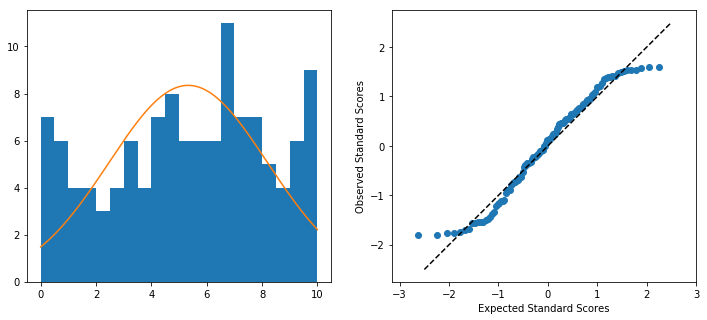

In [60]:
# generate the data
np.random.seed(8322489)

n_points = 120
unif_data = np.random.uniform(0, 10, n_points)

# set up the figure
plt.figure(figsize = [12, 5])

# left subplot: plot the data
plt.subplot(1, 2, 1)
bin_size = 0.5
bin_edges = np.arange(0, 10 + bin_size, bin_size)
plt.hist(x = unif_data, bins = bin_edges);

# overlay a theoretical normal distribution on top
samp_mean = unif_data.mean()
samp_sd = unif_data.std()

from scipy.stats import norm
x = np.linspace(0, 10, 200)
y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
y *= n_points * bin_size # scale the distribution height
plt.plot(x, y)

# right subplot: create a Q-Q plot
plt.subplot(1, 2, 2)

qs = (np.arange(n_points) - .5) / n_points
expected_scores = norm.ppf(qs)
data_scores = (np.sort(unif_data) - samp_mean) / samp_sd

plt.scatter(expected_scores, data_scores)
plt.plot([-2.5,2.5],[-2.5,2.5],'--', color = 'black')
plt.axis('equal')
plt.xlabel('Expected Standard Scores')
plt.ylabel('Observed Standard Scores')

## Swarm Plots

Similar to a scatterplot, each data point is plotted with position according to its value on the two variables being plotted. Instead of randomly jittering points as in a normal scatterplot, points are placed as close to their actual value as possible without allowing any overlap.

ValueError: Could not interpret input 'cat_var'

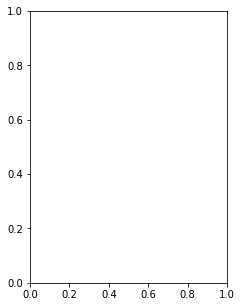

In [61]:
plt.figure(figsize = [12, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sb.violinplot(data = df, x = 'cat_var', y = 'num_var', color = base_color)

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data = df, x = 'cat_var', y = 'num_var', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

# right plot: swarm plot
plt.subplot(1, 3, 3)
sb.swarmplot(data = df, x = 'cat_var', y = 'num_var', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

## Rug and Strip Plots

You might encounter, or be interested in, marginal distributions that are plotted alongside bivariate plots such as scatterplots. A marginal distribution is simply the univariate distribution of a variable, ignoring the values of any other variable. For quantitative data, histograms or density curves are fine choices for marginal plot, but you might also see the rug plot employed. In a rug plot, all of the data points are plotted on a single axis, one tick mark or line for each one. Compared to a marginal histogram, the rug plot suffers somewhat in terms of readability of the distribution, but it is more compact in its representation of the data.

In [ ]:
g = sb.JointGrid(data = df, x = 'num_var1', y = 'num_var2')
g.plot_joint(plt.scatter)
g.plot_marginals(sb.rugplot, height = 0.25)

Another supporting plot type similar to the rug plot is the strip plot. It's like a swarm plot (see the previous page) but without any dodging or jittering to keep points separate or off the categorical line. You can also think of it as a rug plot faceted by categorical levels. You can use seaborn's swarmplot function to add a swarm plot to any other plot. The inner = "stick" and inner = "point" options can also be used with the violinplot function to include a swarm plot inside of the violin areas, instead of a box plot.

In [ ]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]

# left plot: strip plot
plt.subplot(1, 2, 1)
ax1 = sb.stripplot(data = df, x = 'num_var', y = 'cat_var',
                   color = base_color)

# right plot: violin plot with inner strip plot as lines
plt.subplot(1, 2, 2)
sb.violinplot(data = df, x = 'num_var', y = 'cat_var', color = base_color,
             inner = 'stick')

## Stacked Plots

In [ ]:
# pre-processing: count and sort by the number of instances of each category
sorted_counts = df['cat_var'].value_counts()

# establish the Figure
plt.figure(figsize = [12, 5])

# left plot: pie chart
plt.subplot(1, 2, 1)
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square');

# right plot: horizontally stacked bar
plt.subplot(1, 2, 2)
baseline = 0
for i in range(sorted_counts.shape[0]):
    plt.barh(y = 1, width = sorted_counts[i], left = baseline)
    baseline += sorted_counts[i]

plt.legend(sorted_counts.index)  # add a legend for labeling
plt.ylim([0,2]) # give some vertical spacing around the bar

In [ ]:
cat1_order = ['East', 'South', 'West', 'North']
cat2_order = ['Type X', 'Type Y', 'Type Z', 'Type O']

plt.figure(figsize = [12, 5])

# left plot: clustered bar chart, absolute counts
plt.subplot(1, 2, 1)
sb.countplot(data = df, x = 'cat_var1', hue = 'cat_var2',
             order = cat1_order, hue_order = cat2_order)
plt.legend()

# right plot: stacked bar chart, absolute counts
plt.subplot(1, 2, 2)

baselines = np.zeros(len(cat1_order))
# for each second-variable category:
for i in range(len(cat2_order)):
    # isolate the counts of the first category,
    cat2 = cat2_order[i]
    inner_counts = df[df['cat_var2'] == cat2]['cat_var1'].value_counts()
    # then plot those counts on top of the accumulated baseline
    plt.bar(x = np.arange(len(cat1_order)), height = inner_counts[cat1_order],
            bottom = baselines)
    baselines += inner_counts[cat1_order]

plt.xticks(np.arange(len(cat1_order)), cat1_order)
plt.legend(cat2_order)

In [ ]:
cat1_order = ['East', 'South', 'West', 'North']
cat2_order = ['Type X', 'Type Y', 'Type Z', 'Type O']

artists = [] # for storing references to plot elements
baselines = np.zeros(len(cat1_order))
cat1_counts = df['cat_var1'].value_counts()

# for each second-variable category:
for i in range(len(cat2_order)):
    # isolate the counts of the first category,
    cat2 = cat2_order[i]
    inner_counts = df[df['cat_var2'] == cat2]['cat_var1'].value_counts()
    inner_props = inner_counts / cat1_counts
    # then plot those counts on top of the accumulated baseline
    bars = plt.bar(x = np.arange(len(cat1_order)),
                   height = inner_props[cat1_order],
                   bottom = baselines)
    artists.append(bars)
    baselines += inner_props[cat1_order]

plt.xticks(np.arange(len(cat1_order)), cat1_order)
plt.legend(reversed(artists), reversed(cat2_order), framealpha = 1,
           bbox_to_anchor = (1, 0.5), loc = 6);

## Ridgeline Plots

One of the hot new visualization types from recent years is the ridgeline plot. In a nutshell, the ridgeline plot is a series of vertically faceted line plots or density curves, but with somewhat overlapping y-axes. This can be thought of as a contrast to the line plot variation seen in the "Line Plots" part of the lesson, where multiple lines were plotted on the same axes, with different hues. On this page, I'll walk through the creation of a ridgeline plot using some of the demonstration data shown in the "Faceting" page:

In [ ]:
group_means = df.groupby(['many_cat_var']).mean()
group_order = group_means.sort_values(['num_var'], ascending = False).index

g = sb.FacetGrid(data = df, col = 'many_cat_var', col_wrap = 5, size = 2,
                 col_order = group_order)
g.map(plt.hist, 'num_var', bins = np.arange(5, 15+1, 1))
g.set_titles('{col_name}')

In [ ]:
group_means = df.groupby(['many_cat_var']).mean()
group_order = group_means.sort_values(['num_var'], ascending = False).index

g = sb.FacetGrid(data = df, row = 'many_cat_var', size = 0.75, aspect = 7,
                 row_order = group_order)
g.map(sb.kdeplot, 'num_var', shade = True)
g.set_titles('{row_name}')

In [ ]:
group_means = df.groupby(['many_cat_var']).mean()
group_order = group_means.sort_values(['num_var'], ascending = False).index

# adjust the spacing of subplots with gridspec_kws
g = sb.FacetGrid(data = df, row = 'many_cat_var', size = 0.5, aspect = 12,
                 row_order = group_order, gridspec_kws = {'hspace' : -0.2})
g.map(sb.kdeplot, 'num_var', shade = True)

# remove the y-axes
g.set(yticks=[])
g.despine(left=True)

g.set_titles('{row_name}')

In [ ]:
group_means = df.groupby(['many_cat_var']).mean()
group_order = group_means.sort_values(['num_var'], ascending = False).index

g = sb.FacetGrid(data = df, row = 'many_cat_var', size = 0.5, aspect = 12,
                 row_order = group_order, gridspec_kws = {'hspace' : -0.2})
g.map(sb.kdeplot, 'num_var', shade = True)

g.set(yticks=[])
g.despine(left=True)

# set the transparency of each subplot to full
g.map(lambda **kwargs: plt.gca().patch.set_alpha(0))

# remove subplot titles and write in new labels
def label_text(x, **kwargs):
    plt.text(4, 0.02, x.iloc[0], ha = 'center', va = 'bottom')
g.map(label_text, 'many_cat_var')
g.set_xlabels('num_var')
g.set_titles('')

# Multivariate

## Encoding via Shape

Shape is a good encoding for categorical variables, using one shape for each level of the categorical variable. Unfortunately, there is no built-in way to automatically assign different shapes in a single call of the scatter or regplot function. Instead, we need to write a loop to call our plotting function multiple times, isolating data points by categorical level and setting a different "marker" argument value for each one.


In [ ]:

cat_markers = [['A', 'o'],
               ['B', 's']]

for cat, marker in cat_markers:
    df_cat = df[df['cat_var1'] == cat]
    plt.scatter(data = df_cat, x = 'num_var1', y = 'num_var2', marker = marker)
plt.legend(['A','B'])


In [ ]:
plt.scatter(data = df, x = 'num_var1', y = 'num_var2', s = 'num_var3')

# dummy series for adding legend
sizes = [20, 35, 50]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.legend(legend_obj, sizes)

In [ ]:
plt.figure(figsize = [5,5])

common_size = 2500
plt.scatter([0],[1], marker = 's', s = common_size)
plt.scatter([1],[1], marker = '^', s = common_size)
plt.scatter([0],[0], marker = 'o', s = common_size)
plt.scatter([1],[0], marker = 'X', s = common_size)

# a little bit of aesthetic cleaning
plt.xlim(-0.5,1.5)
plt.xticks([])
plt.ylim(-0.5,1.5)
plt.yticks([])

## Encoding via Color

    Qualitative (all up to 6 colors): 'deep', 'pastel', 'dark', 'muted', 'bright', 'colorblind'
    Sequential: 'rocket' (white-orange-red-purple-black), 'mako' (mint-green-blue-purple-black)
    Diverging: 'vlag' (blue-white-red), 'icefire' (blue-black-orange)

For all of these strings, appending '_r' reverses the palette, which is useful if a sequential or diverging palette is rendered counter to your expectations.

In [ ]:
g = sb.FacetGrid(data = df, hue = 'cat_var1', size = 5)
g.map(plt.scatter, 'num_var1', 'num_var2')
g.add_legend()

In [ ]:
plt.scatter(data = df, x = 'num_var1', y = 'num_var2', c = 'num_var3')
plt.colorbar()

In [ ]:
g = sb.FacetGrid(data = df, hue = 'cat_var1', size = 5,
                 palette = 'colorblind')
g.map(plt.scatter, 'num_var1', 'num_var2')
g.add_legend()

In [ ]:
plt.scatter(data = df, x = 'num_var1', y = 'num_var2', c = 'num_var3',
            cmap = 'mako_r')
plt.colorbar()

In [ ]:
## Faceting for Multivariate Data

In [ ]:
g = sb.FacetGrid(data = df, col = 'cat_var1', size = 4)
g.map(sb.boxplot, 'cat_var2', 'num_var2')

In [ ]:
g = sb.FacetGrid(data = df, col = 'cat_var2', row = 'cat_var1', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'num_var1', 'num_var2')

## Other Adaptations of Bivariate Plots

In [ ]:
xbin_edges = np.arange(0.25, df['num_var1'].max()+0.5, 0.5)
ybin_edges = np.arange(7,    df['num_var2'].max()+0.5, 0.5)

# count number of points in each bin
xbin_idxs = pd.cut(df['num_var1'], xbin_edges, right = False,
                    include_lowest = True, labels = False).astype(int)
ybin_idxs = pd.cut(df['num_var2'], ybin_edges, right = False,
                    include_lowest = True, labels = False).astype(int)

pts_per_bin = df.groupby([xbin_idxs, ybin_idxs]).size()
pts_per_bin = pts_per_bin.reset_index()
pts_per_bin = pts_per_bin.pivot(index = 'num_var1', columns = 'num_var2').values

z_wts = df['num_var3'] / pts_per_bin[xbin_idxs, ybin_idxs]

# plot the data using the calculated weights
plt.hist2d(data = df, x = 'num_var1', y = 'num_var2', weights = z_wts,
           bins = [xbin_edges, ybin_edges], cmap = 'viridis_r', cmin = 0.5);
plt.xlabel('num_var1')
plt.ylabel('num_var2');
plt.colorbar(label = 'mean(num_var3)');

In [ ]:
cat_means = df.groupby(['cat_var1', 'cat_var2']).mean()['num_var2']
cat_means = cat_means.reset_index(name = 'num_var2_avg')
cat_means = cat_means.pivot(index = 'cat_var2', columns = 'cat_var1',
                            values = 'num_var2_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(num_var2)'})

In [ ]:
ax = sb.barplot(data = df, x = 'cat_var1', y = 'num_var2', hue = 'cat_var2')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'cat_var2')

In [ ]:
ax = sb.pointplot(data = df, x = 'cat_var1', y = 'num_var2', hue = 'cat_var2',
                  dodge = 0.3, linestyles = "")

In [ ]:
def mean_poly(x, y, bins = 10, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()

    # create plot
    plt.errorbar(x = bin_centers, y = means, **kwargs)

bin_edges = np.arange(0.25, df['num_var1'].max()+0.5, 0.5)
g = sb.FacetGrid(data = df, hue = 'cat_var2', size = 5)
g.map(mean_poly, "num_var1", "num_var2", bins = bin_edges)
g.set_ylabels('mean(num_var2)')
g.add_legend()

## Plot Matrices

In [ ]:
g = sb.PairGrid(data = df, vars = ['num_var1', 'num_var2', 'num_var3'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

In [ ]:
g = sb.PairGrid(data = df, x_vars = ['num_var1', 'num_var2', 'num_var3'],
                y_vars = ['cat_var1','cat_var2'])
g.map(sb.violinplot, inner = 'quartile')

## Correlation Matrices

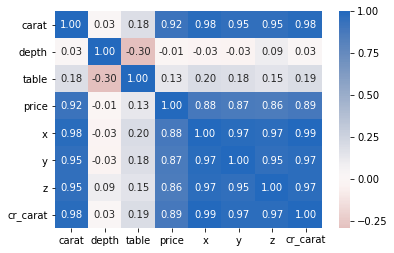

In [63]:
sb.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

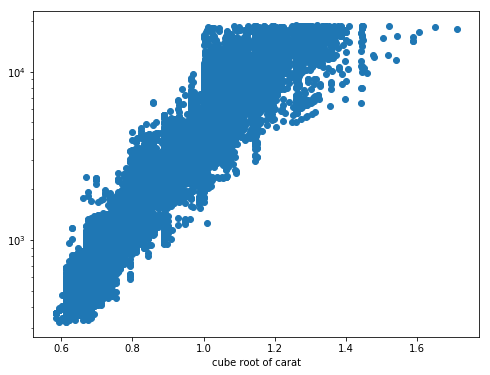

In [5]:
# scatter plot of price vs. carat, with log transform on price axis and
# cube-root transform on price
diamonds['cr_carat'] = diamonds['carat'].apply(cuberoot_trans)

plt.figure(figsize = [8, 6])

plt.scatter(data = diamonds, x = 'cr_carat', y = 'price')

plt.xlabel('cube root of carat')

plt.yscale('log')

plt.show()

In [6]:
# select diamonds of approximately 1 carat
diamond_flag = (diamonds['carat'] >= 0.99) & (diamonds['carat'] <= 1.03)
diamonds_1c = diamonds.loc[diamond_flag,:]

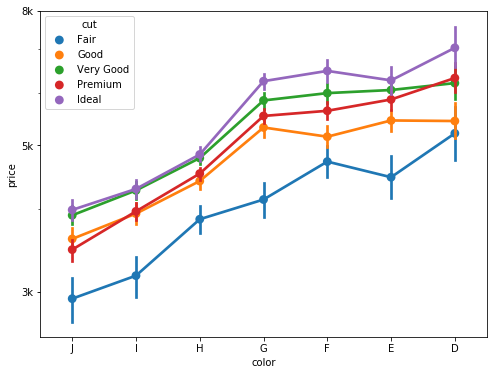

In [7]:
plt.figure(figsize = [8,6])

ax = sb.pointplot(data = diamonds_1c, x = 'color', y = 'price', hue = 'cut')

# special handling of tick marks following seaborn function - you might try
# doing a log transform on the data itself instead of this workaround.
plt.yscale('log')
plt.yticks([3000, 5000, 8000], ['3k', '5k', '8k'])
ax.set_yticklabels([], minor = True)

plt.show();

# Custom Palette

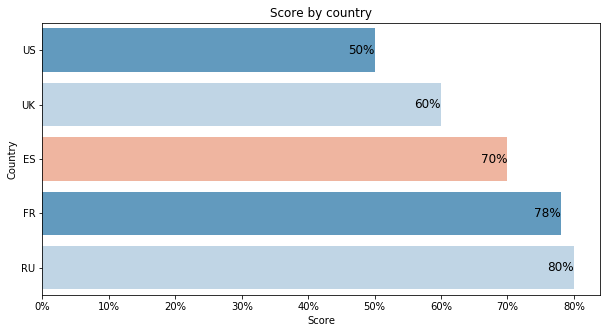

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
def plot_bar(df, title="", figsize=(10,5), x_col='', y_col='', x_label='', y_label='', highlight_pos=[], highlight_neg=[]):
    # Build a custom palette to highlight the new values
    custom_palette = []
    for index, row in df.iterrows():
        if row[y_col] in highlight_pos:
            custom_palette.append(sns.color_palette("Blues")[3])
        elif row[y_col] in highlight_neg:
            custom_palette.append(sns.color_palette("Reds")[1])
        else:
            custom_palette.append(sns.color_palette("Blues")[1])
    # Build the subplot
    fig,ax=plt.subplots(1,1,figsize=figsize);
    # Draw the plot
    ax = sns.barplot(x=x_col, ax=ax, y=y_col, data=df, palette = custom_palette )
    ax.set_title(title);
    ax.set_xlabel(x_label);
    ax.set_ylabel(y_label);
    # Set the labels of X axis
    vals = ax.get_xticks();
    ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals]);
    # Put percentage on the bar
    for index, row in df.iterrows():
        ax.text(x=row[x_col],y=index, s=f'{row[x_col]:,.0%}', fontsize=12, color='black', ha="right", va='center')
    # Draw
    plt.show();
    
df_test = pd.DataFrame({'country_code': ['US', 'UK', 'ES', 'FR', 'RU'],
                    'score': [0.5, 0.6, 0.7,0.78,0.8]
                    })
plot_bar(df_test, title='Score by country',x_col='score',y_col='country_code', x_label='Score', y_label='Country',
         highlight_pos=['US', 'FR']
        , highlight_neg=['ES'])